In [223]:
import warnings
warnings.filterwarnings
import pandas as pd,numpy as np

In [224]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [225]:
print(churn_data.shape)

(7043, 9)


In [226]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [227]:
customer_data.shape

(7043, 5)

In [228]:
internet_data = pd.read_csv("internet_data.csv")

In [229]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [230]:
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [231]:
df_1.shape

(7043, 13)

In [232]:
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [233]:
telecom.shape

(7043, 21)

In [234]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [235]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [236]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [237]:
#For categorical variables with multiple levels, create dummy features (one-hot encoded)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

telecom.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [238]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,False,False,True,False,False,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,False,True,True,False,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,False,False,False,True,True,False,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,False,False,False,True,False,False,True,False,True,False


In [239]:
# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

telecom.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


In [240]:
# Dropping the repeated variables

# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)


In [241]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,True,False,True,False,True,False,True,False,True,False


In [242]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

In [243]:
#Checking for Outliers

# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]


In [244]:
#Checking for Missing Values and Inputing Them
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [245]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [246]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [247]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

## Step 4: Test-Train Split

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X=telecom.drop(['Churn','customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,True,True,False,True,False,True,False,True,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,False,True,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,True,False,False,True,False,True,True,False,True,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False


In [250]:
y = telecom['Churn']

y.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [251]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


Step 5: Feature Scaling

In [252]:
from sklearn.preprocessing import StandardScaler

In [253]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,False,False,...,False,True,True,False,True,False,False,True,False,True
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,False,False,...,False,True,False,True,True,False,True,False,True,False
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,False,False,...,False,True,False,True,False,True,False,True,False,True
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,False,False,...,True,False,False,True,False,True,False,True,False,True


In [254]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

Step 6: Looking at Correlations

In [255]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

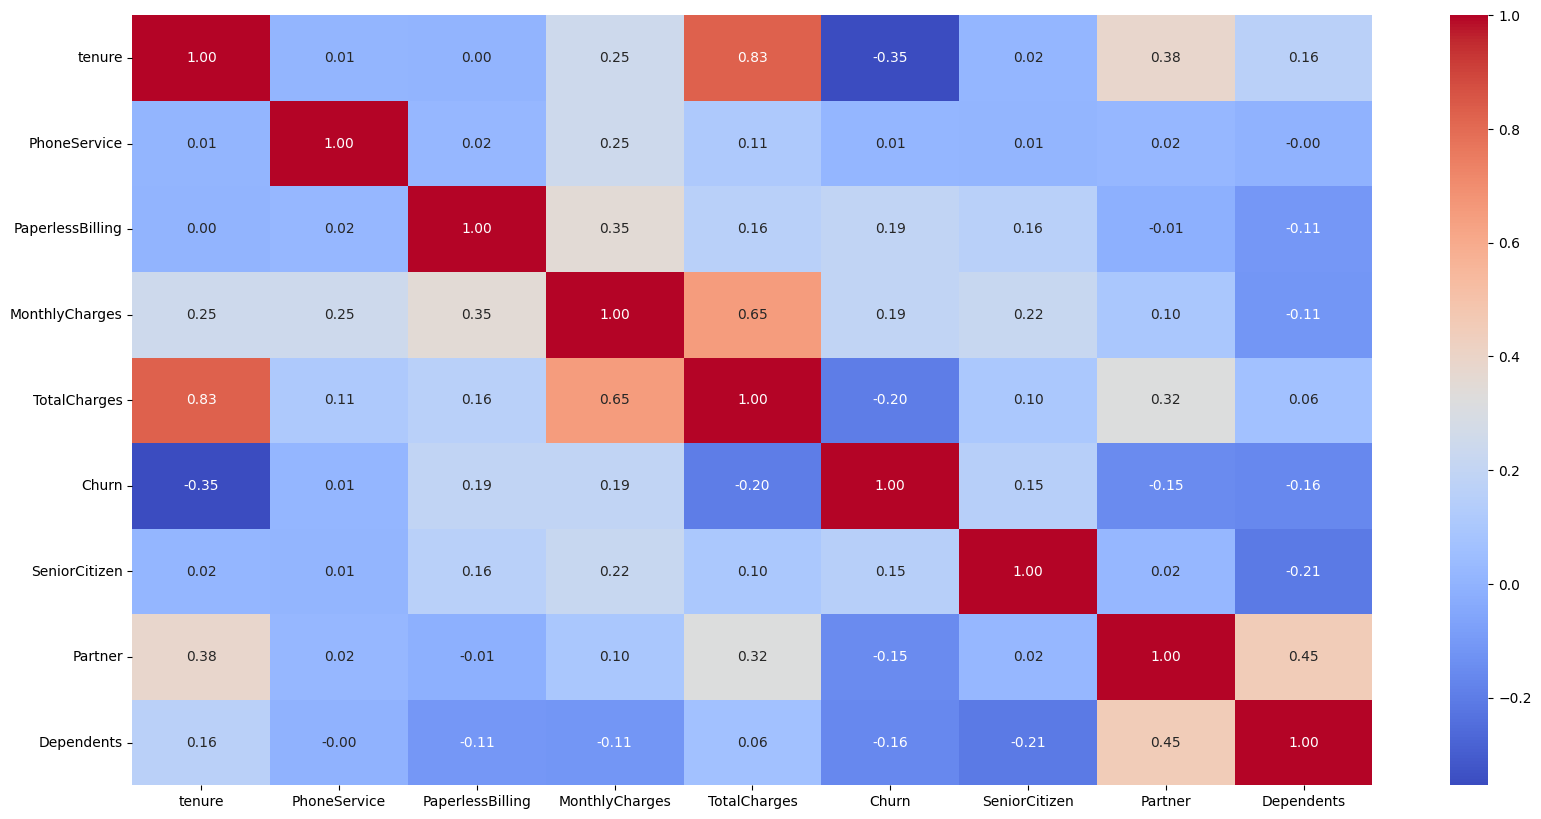

In [256]:
# Let's see the correlation matrix 
# plt.figure(figsize = (20,10))        # Size of the figure
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_telecom = telecom.select_dtypes(include=['number'])

# Plot the correlation matrix
plt.figure(figsize=(20, 10))  # Adjust figure size
sns.heatmap(numeric_telecom.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


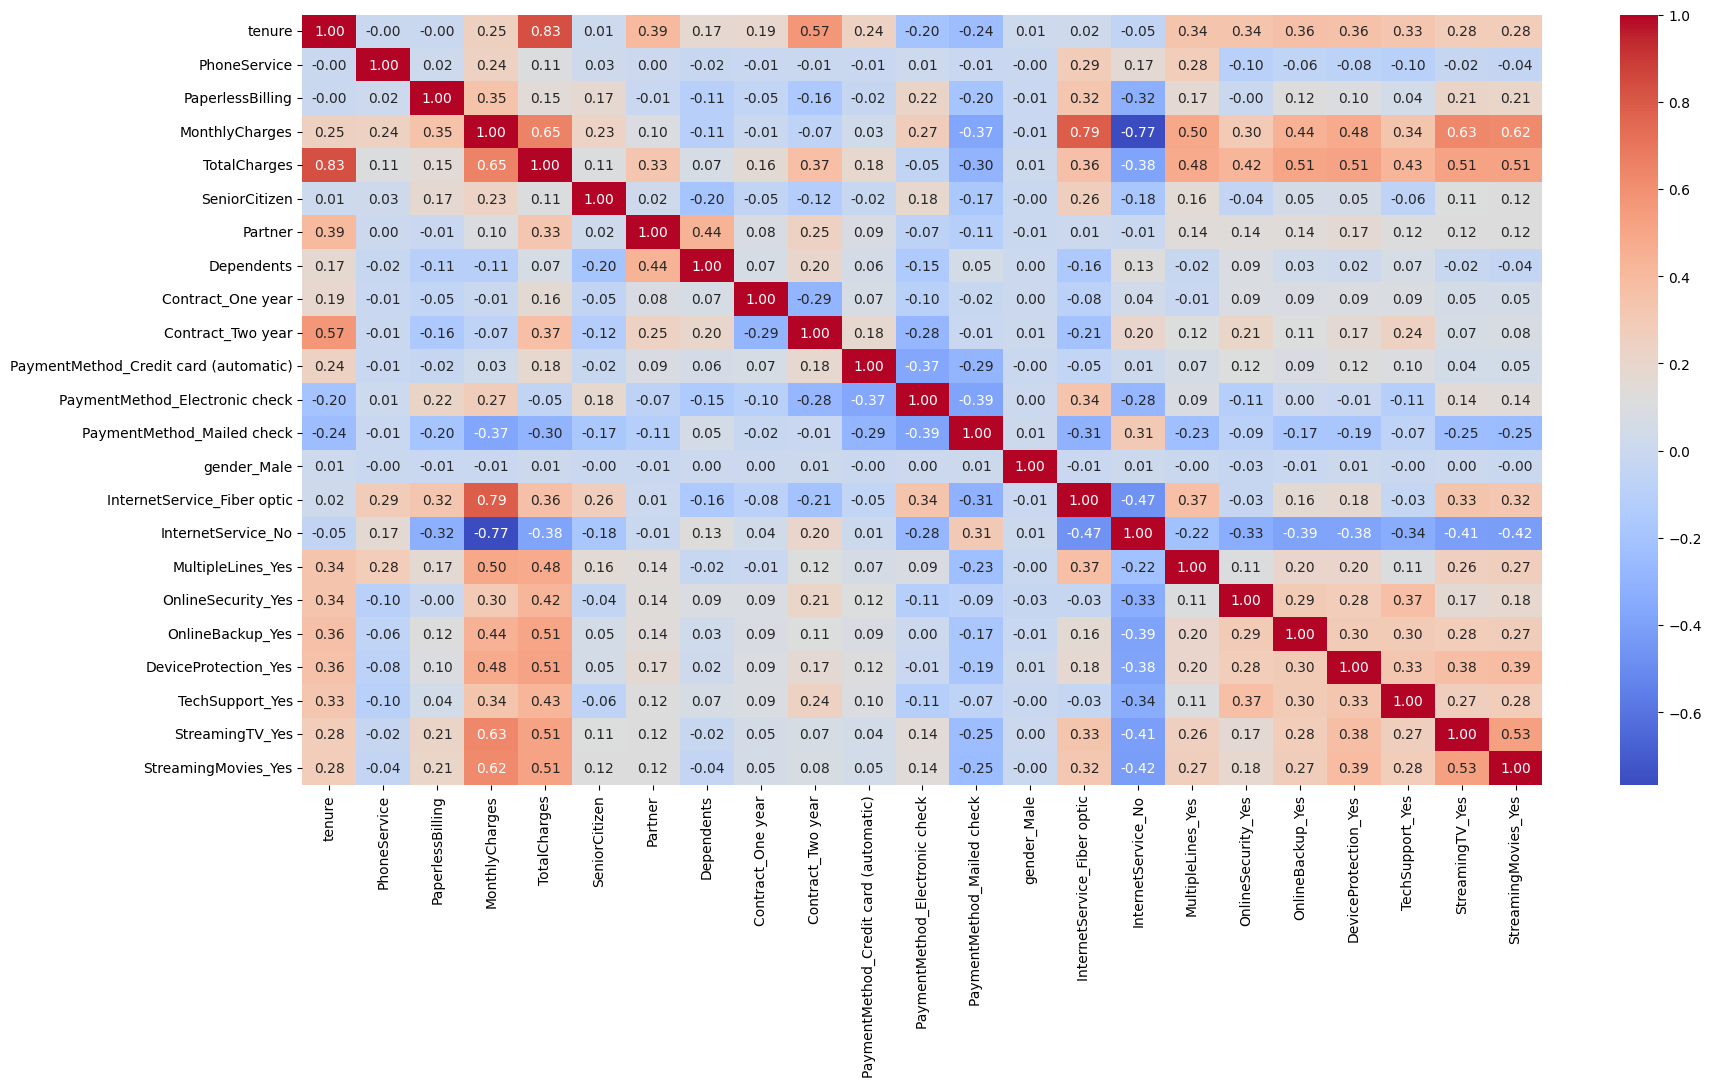

In [257]:
# Dropping highly correlated dummy variables
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No',
                      'DeviceProtection_No','TechSupport_No','StreamingTV_No',
                      'StreamingMovies_No'], axis=1)

X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No',
                        'DeviceProtection_No','TechSupport_No','StreamingTV_No',
                        'StreamingMovies_No'], axis=1)

# Checking the Correlation Matrix again
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Step 7: Model Building

In [261]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2110 entries, 942 to 4987
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 2110 non-null   int64  
 1   PhoneService                           2110 non-null   int64  
 2   PaperlessBilling                       2110 non-null   int64  
 3   MonthlyCharges                         2110 non-null   float64
 4   TotalCharges                           2110 non-null   float64
 5   SeniorCitizen                          2110 non-null   int64  
 6   Partner                                2110 non-null   int64  
 7   Dependents                             2110 non-null   int64  
 8   Contract_One year                      2110 non-null   bool   
 9   Contract_Two year                      2110 non-null   bool   
 10  PaymentMethod_Credit card (automatic)  2110 non-null   bool   
 11  Payment

In [262]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 879 to 5649
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4922 non-null   float64
 1   PhoneService                           4922 non-null   int64  
 2   PaperlessBilling                       4922 non-null   int64  
 3   MonthlyCharges                         4922 non-null   float64
 4   TotalCharges                           4922 non-null   float64
 5   SeniorCitizen                          4922 non-null   int64  
 6   Partner                                4922 non-null   int64  
 7   Dependents                             4922 non-null   int64  
 8   Contract_One year                      4922 non-null   bool   
 9   Contract_Two year                      4922 non-null   bool   
 10  PaymentMethod_Credit card (automatic)  4922 non-null   bool   
 11  Payment

In [265]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [266]:
print(X_train.dtypes)  # Ensure all columns are numeric
print(X_train.applymap(lambda x: type(x)).nunique())  # Check data types inside each column


tenure                                   float64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
gender_Male                                 bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
MultipleLines_Yes                           bool
OnlineSecurity_Yes                          bool
OnlineBackup_Yes                            bool
DeviceProtection_Yes                        bool
TechSupport_Yes     

C:\Users\ASHISH RAJ\AppData\Local\Temp\ipykernel_16360\960630507.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_train.applymap(lambda x: type(x)).nunique())  # Check data types inside each column


In [267]:
X_train = X_train.astype(int)

In [268]:
y_train = pd.to_numeric(y_train, errors='coerce')

In [269]:
X_train = X_train.dropna()
y_train = y_train.dropna()


In [270]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logm1_fit = logm1.fit()
print(logm1_fit.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.7
Date:                Wed, 19 Mar 2025   Deviance:                       4037.4
Time:                        13:59:07   Pearson chi2:                 5.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2803
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------